## 3251 TERM PROJECT 

### PREDICTING MEDICAL EXPENSES USING LINEAR REGRESSION

<ul> Columns

<li> age: age of primary beneficiary
<li> sex: insurance contractor gender, female, male
<li> bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to <li> height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
<li> children: Number of children covered by health insurance / Number of dependents
<li> smoker: Smoking
<li> region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
<li> charges: Individual medical costs billed by health insurance

In [1]:
import numpy as np
import math
import pandas as pd
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
import statsmodels
import sklearn.linear_model
import scipy, scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.options.display.max_rows = 10

In [2]:
#Load data
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The beneficiaries' ages range from 18 years to 64 years. 
The average, medical cost is USD 13,270 with a median value of USD 9382.

In [5]:
df.groupby("sex")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [6]:
df.groupby("smoker")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [7]:
df.groupby("region")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [8]:
#check if there is null data
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [9]:
"""#female =0 male=1
lb_sex = LabelEncoder()
df["sex"]=lb_sex.fit_transform(df["sex"])

# smoker =1 non-smoker =0
lb_smoker=LabelEncoder()
df["smoker"] = lb_smoker.fit_transform(df["smoker"])"""


'#female =0 male=1\nlb_sex = LabelEncoder()\ndf["sex"]=lb_sex.fit_transform(df["sex"])\n\n# smoker =1 non-smoker =0\nlb_smoker=LabelEncoder()\ndf["smoker"] = lb_smoker.fit_transform(df["smoker"])'

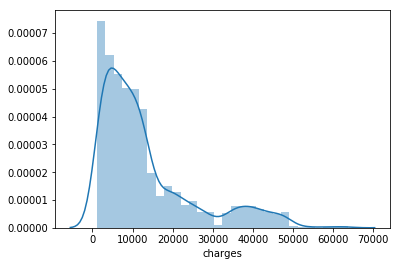

In [10]:
sns.distplot(df["charges"], bins=30)
plt.show()

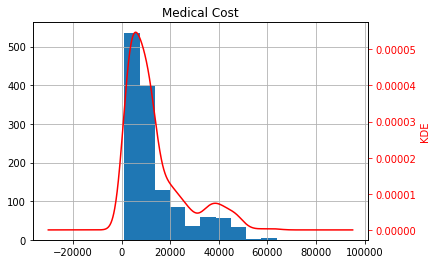

In [11]:
plt.figure()
ax= df.charges.hist(label='Medical Cost')
ax2 = ax.twinx()
df.charges.plot(kind='kde',color='r') #label='KDE'
ax2.set_ylabel('KDE', color='r')
ax2.tick_params('y', colors='r')
#plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
plt.title('Medical Cost');

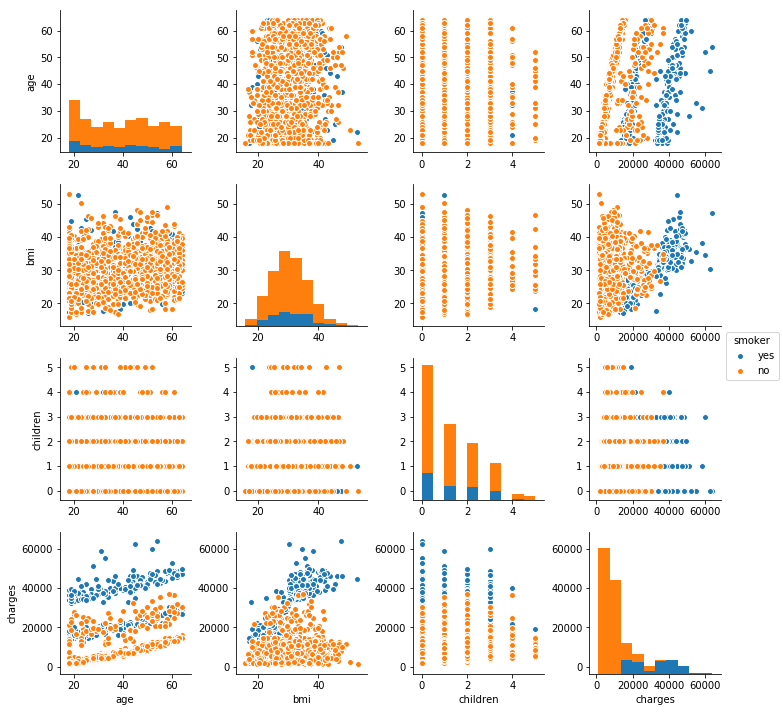

In [12]:
sns.pairplot(df, hue='smoker')

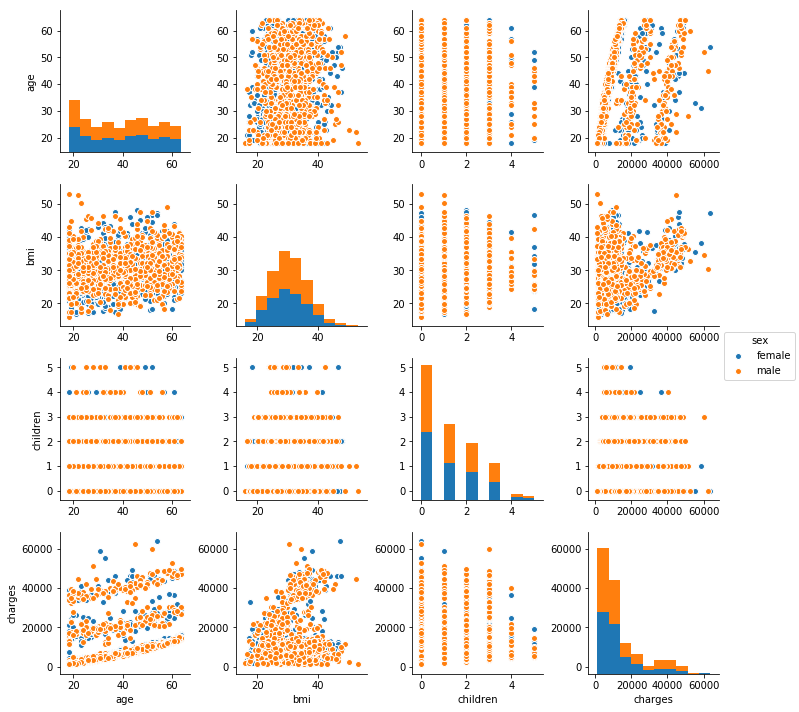

In [13]:
sns.pairplot(df, hue='sex')

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


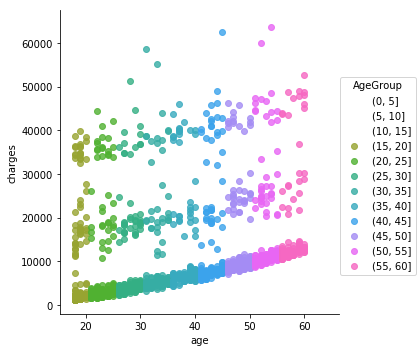

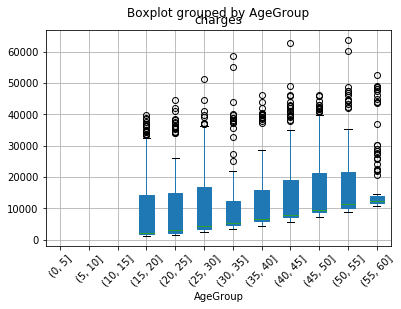

In [14]:
bins1=[0,5,10,15,20,25,30,35,40,45,50,55,60]
df['AgeGroup']=pd.cut(df['age'], bins1)
data=pd.value_counts(df['AgeGroup']).sort_index()
sns.lmplot(x="age", y="charges", data=df, fit_reg=False, hue='AgeGroup')
df.boxplot(column='charges', by='AgeGroup',patch_artist=True, rot=45)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


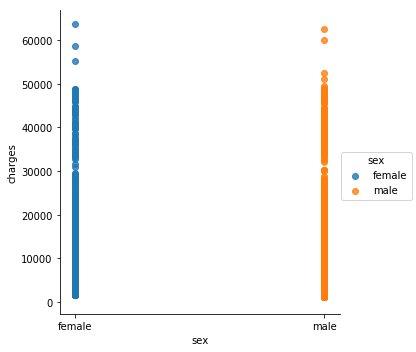

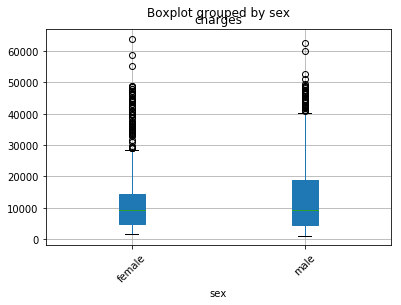

In [15]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sex", y="charges", data=df, fit_reg=False, hue='sex')
df.boxplot(column='charges', by='sex',patch_artist=True, rot=45)

<ul> Underweight: Your BMI is less than 18.5 </ul>
<ul> Healthy weight: Your BMI is 18.5 to 24.9. </ul>
<ul> Overweight: Your BMI is 25 to 29.9.</ul>
<ul> Obese: Your BMI is 30 or higher </ul>

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


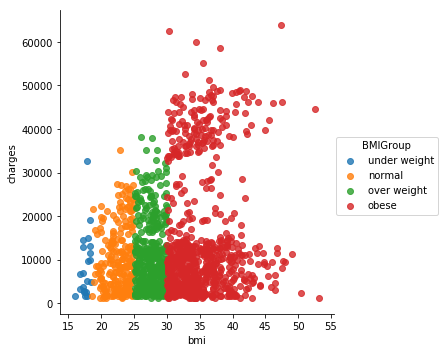

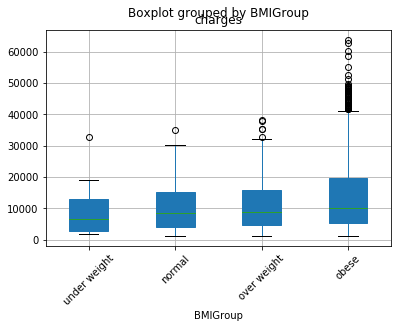

In [16]:
bins2=[0,18.5,25,30,55]
labels=['under weight', 'normal', 'over weight', 'obese']
df['BMIGroup']=pd.cut(df['bmi'], bins=bins2, labels=labels)
sns.lmplot(x="bmi", y="charges", data=df, fit_reg=False, hue='BMIGroup')
df.boxplot(column='charges', by='BMIGroup',patch_artist=True, rot=45)

In [17]:
df.groupby("BMIGroup")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
BMIGroup,,,,,,,,
under weight,21.0,8657.620652,7591.730101,1621.3402,2775.192150,6640.544850,12829.455100,32734.18630
normal,226.0,10435.440719,7484.434940,1121.8739,4146.836312,8604.153525,15197.264325,35069.37452
over weight,386.0,10997.803881,8067.254166,1252.4070,4593.881375,8659.378000,15751.161360,38245.59327
obese,705.0,15560.926321,14563.057442,1131.5066,5240.765000,9964.060000,19673.335730,63770.42801


People who are obsese pay USD5000 more in average

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


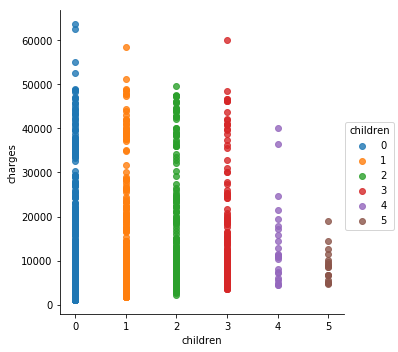

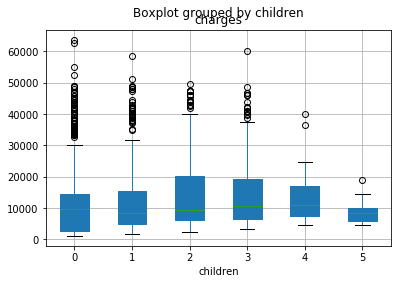

In [18]:
sns.lmplot(x="children", y="charges", data=df, fit_reg=False, hue='children')
df.boxplot(column='charges', by='children',patch_artist=True)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


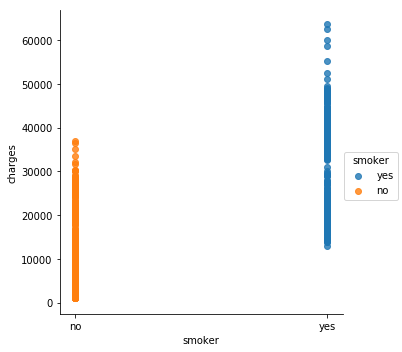

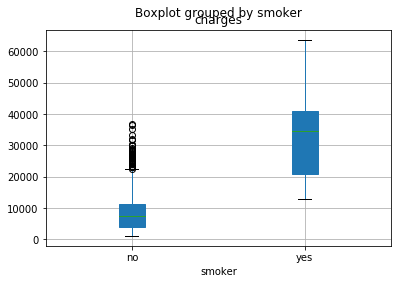

In [19]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="smoker", y="charges", data=df, fit_reg=False, hue='smoker')
df.boxplot(column='charges', by='smoker',patch_artist=True)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


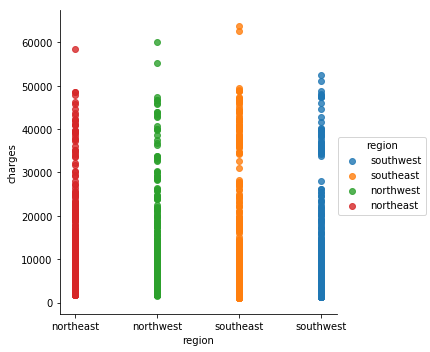

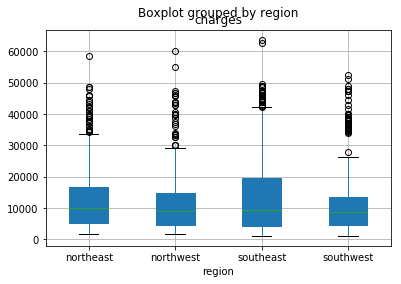

In [20]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="region", y="charges", data=df, fit_reg=False, hue='region')
df.boxplot(column='charges', by='region',patch_artist=True)

In [21]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


We can see that age has the highest correlation with charges amongst our numeric variables. Another observation we can make from this plot is that none of our numeric values is highly correlated with each other, so multicollinearity wouldn’t be a problem. Another thing to note is that the relationship between age and charges might not be really linear at all.

In [22]:
result1 = sm.ols(formula='df.charges ~ df.age+df.sex+df.bmi+df.children+df.smoker+df.region', data=df).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 05 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:40:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
df.sex[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
df.smoker[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
df.region[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
df.region[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
df.region[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
df.age                   256.8564     11.899     21.587      0.000     233.514     280.199
df.bmi                   339.1935     28.599     11.860      0.000     283.088     395.298
df.children              475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On the first model we only utilized those original variables included in the dataset and got a decent r-squared of 0.7509 which implies that 75.09% of the variation of charges could be explained by the set of independent variables we have included. We could also observe that all of the independent variables we have included with the exception of gender is a statistically significant predictor of medical charges (p-value less than 0.05 <- level of significance).

In [23]:
#Second model using derived variables
df['age2']=df['age']**2

result2 = sm.ols(formula='df.charges ~ df.age+df.age2+df.children+df.bmi+df.sex+df.bmi*df.smoker+df.region', data=df).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     715.0
Date:                Sun, 05 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:40:43   Log-Likelihood:                -13237.
No. Observations:                1338   AIC:                         2.650e+04
Df Residuals:                    1327   BIC:                         2.655e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2854.3259   1390.284      2.053      0.040     126.932    5581.720
df.sex[T.male]           -506.4115    264.480     -1.915      0.056   -1025.256      12.433
df.smoker[T.yes]        -2.034e+04   1635.729    -12.437      0.000   -2.36e+04   -1.71e+04
df.region[T.northwest]   -599.3058    377.955     -1.586      0.113   -1340.759     142.148
df.region[T.southeast]  -1206.5334    379.820     -3.177      0.002   -1951.646    -461.421
df.region[T.southwest]  -1228.3427    379.291     -3.239      0.001   -1972.419    -484.267
df.age                    -33.2129     64.598     -0.514      0.607    -159.938      93.513
df.age2                     3.7430      0.806      4.645      0.000       2.162       5.324
df.children               675.0593    114.547      5.893      0.000     450.347     899.772
df.bmi                     20.1770     25.415      0.794      0.427     -29.681      70.035
df.bmi:df.smoker[T.yes]  1441.0852     52.246     27.583      0.000    1338.592    1543.578
==============================================================================
Omnibus:                      737.513   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4758.545
Skew:                           2.581   Prob(JB):                         0.00
Kurtosis:                      10.662   Cond. No.                     2.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

First thing I did in this chunk is to create a new variable age2 which is basically age squared. Like I’ve said earlier, relationship between age and charges might not be totally linear so the idea behind this is to include the variable age2 to deal with this non-linearity in our model.

As we can see, by adding those variables we have derived has significantly improved our model. We now have a r-squared of 0.8664 which implies 86.64% of variation of charges can be explained by our independent variables in the model. Adjusted R-squared of the second model is also a lot better compared to that of the previous one which further solidify our claim.

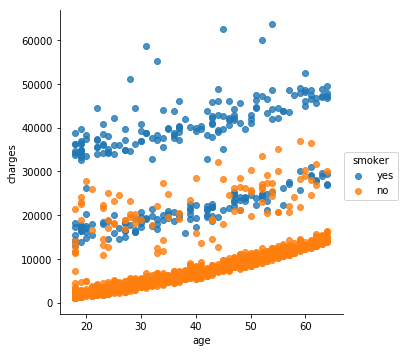

In [24]:
sns.lmplot(x="age", y="charges", data=df, fit_reg=False, hue='smoker')

In [25]:
result3 = sm.ols(formula='df.charges ~ df.age+df.smoker', data=df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Sun, 05 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:40:43   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
df.smoker[T.yes]  2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
df.age             274.8712     12.455     22.069      0.000     250.437     299.305
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""